In [13]:
import numpy as np  
seed = 7
np.random.seed(seed)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import pandas as pd
import pandas
import numpy as np

NUM_FEATURES = 31
 
dataframe = pandas.read_csv("data/features_feb7_both_london.csv", header=0)

established = dataframe[dataframe.stable==1] # established 
new = dataframe[dataframe.stable==0] # new
 
# category 0 defines venues that closed 
# since we expect to have more venues that remained open than those that 
# closed, we select all of the closed venues and then a random sample of 
# opened venues of the same size, created balanced classes
class_one = dataframe[dataframe.label==0]
class_two = dataframe[dataframe.label==1].sample(n=len(class_one), replace=False)
dataset = pd.concat([class_one, class_two], ignore_index=True)
dataset = dataset.values 
 
X = dataset[:, 0:NUM_FEATURES]
y = dataset[:, NUM_FEATURES]

In [13]:
dataframe

,venue,in_sur,out_sur,ratio_sur,in_raw,out_raw,ratio_raw,dist_sur_ent,dist_sur_ent_std,dis_sur_lea,...,spec_idx,gen_idx,spec_count,gen_count,all_count,spec_gen,gen_all,entropy,label,stable
0,0.0,1067.0,1018.0,1.048134,358.0,130.0,2.753846,2.786542,0.572518,2.178256,...,414.0,28.0,0.0,0.0,16.0,0.0,0.0,0.263470,1.0,1.0
1,1.0,111779.0,108405.0,1.031124,137.0,172.0,0.796512,1.028312,0.553835,0.998675,...,224.0,8.0,0.0,0.0,470.0,0.0,0.0,0.089108,1.0,1.0
2,2.0,26682.0,27000.0,0.988222,403.0,407.0,0.990172,1.374051,0.825114,1.210434,...,112.0,22.0,0.0,0.0,193.0,0.0,0.0,0.105518,1.0,1.0
3,3.0,244685.0,224233.0,1.091209,227.0,195.0,1.164103,1.045938,0.668079,0.955995,...,356.0,8.0,0.0,0.0,1140.0,0.0,0.0,0.067842,1.0,1.0
4,4.0,45792.0,44384.0,1.031723,173.0,167.0,1.035928,1.571304,0.890289,1.381564,...,281.0,20.0,0.0,0.0,263.0,0.0,0.0,0.128370,1.0,1.0
5,5.0,625.0,618.0,1.011327,235.0,260.0,0.903846,2.787972,1.525291,1.627574,...,396.0,11.0,0.0,0.0,14.0,0.0,0.0,0.302490,1.0,1.0
6,6.0,1344.0,1518.0,0.885375,104.0,207.0,0.502415,3.018414,1.153065,3.199381,...,161.0,8.0,0.0,0.0,12.0,0.0,0.0,0.255966,1.0,1.0
7,7.0,21382.0,22629.0,0.944894,59.0,199.0,0.296482,3.068894,1.861596,3.619629,...,342.0,20.0,0.0,0.0,64.0,0.0,0.0,0.190081,1.0,1.0
8,8.0,12308.0,11243.0,1.094726,457.0,330.0,1.384848,1.746254,1.031533,1.482733,...,23.0,25.0,0.0,0.0,125.0,0.0,0.0,0.128966,1.0,1.0
9,9.0,72176.0,72389.0,0.997058,146.0,214.0,0.682243,1.819730,1.341753,2.038920,...,36.0,35.0,0.0,0.0,226.0,0.0,0.0,0.102694,1.0,1.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print the distribution of classes on train/test
print pd.value_counts(pd.Series(y_test), normalize=True)
print pd.value_counts(pd.Series(y_train), normalize=True)

1.0    0.5
0.0    0.5
dtype: float64
1.0    0.5
0.0    0.5
dtype: float64


In [5]:

from sklearn.linear_model import LogisticRegression

# logistic regression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_LR = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_LR[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

#logistic regression coefficients 
pd.concat([pd.DataFrame(dataframe.columns)[:-1],pd.DataFrame(np.transpose(clf.coef_))], axis = 1)

0.616279069767
0.673336938886
             precision    recall  f1-score   support

        0.0       0.60      0.72      0.65        43
        1.0       0.65      0.51      0.57        43

avg / total       0.62      0.62      0.61        86



,0,0
0,venue,-0.082354
1,in_sur,-0.033474
2,out_sur,-0.107330
3,ratio_sur,0.010693
4,in_raw,0.732559
5,out_raw,0.733388
6,ratio_raw,-0.024997
7,dist_sur_ent,0.119331
8,dist_sur_ent_std,-0.397366
9,dis_sur_lea,0.541436


In [6]:
from sklearn import ensemble

# gradient boosting 
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_GB = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.732558139535
0.802595997837
             precision    recall  f1-score   support

        0.0       0.72      0.77      0.74        43
        1.0       0.75      0.70      0.72        43

avg / total       0.73      0.73      0.73        86



In [7]:
from sklearn.dummy import DummyClassifier

# random baseline
clf = DummyClassifier(strategy='uniform')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_random = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_random[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.511627906977
0.5
             precision    recall  f1-score   support

        0.0       0.51      0.51      0.51        43
        1.0       0.51      0.51      0.51        43

avg / total       0.51      0.51      0.51        86



In [8]:
from sklearn.svm import SVC

# svc
clf = SVC(probability=True)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_SVC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.627906976744
0.802595997837
             precision    recall  f1-score   support

        0.0       0.60      0.77      0.67        43
        1.0       0.68      0.49      0.57        43

avg / total       0.64      0.63      0.62        86



In [9]:
from sklearn.ensemble import RandomForestClassifier

# random forest
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_RFC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))
 
print (metrics.classification_report(y_test, predicted)) 

0.674418604651
0.802595997837
             precision    recall  f1-score   support

        0.0       0.65      0.77      0.70        43
        1.0       0.71      0.58      0.64        43

avg / total       0.68      0.67      0.67        86



In [10]:
from sklearn.neural_network import MLPClassifier

# neural net 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_NN = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_NN[:, 1]))
 
print (metrics.classification_report(y_test, predicted))

0.546511627907
0.572742022715
             precision    recall  f1-score   support

        0.0       0.54      0.63      0.58        43
        1.0       0.56      0.47      0.51        43

avg / total       0.55      0.55      0.54        86



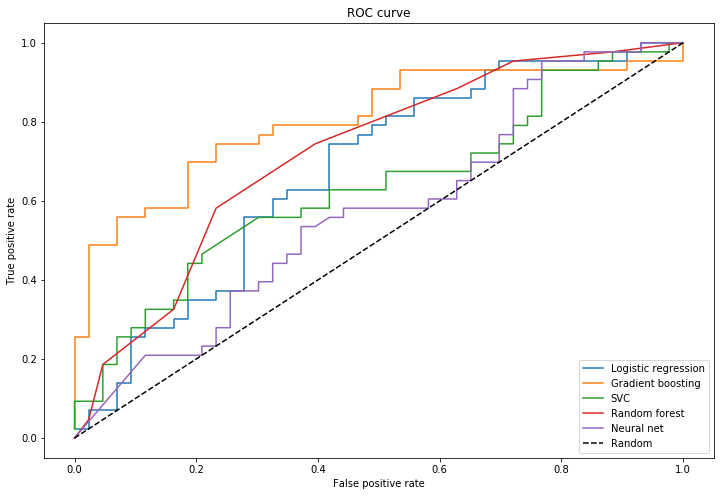

In [11]:
from matplotlib import pyplot as plt

# plot area under curve in order to compare multiple classifiers
fpr, tpr, _ = metrics.roc_curve(y_test, probs_LR[:, 1]) #classifier 1
fpr2, tpr2, _ = metrics.roc_curve(y_test, probs_GB[:, 1]) #classifier 2
fpr3, tpr3, _ = metrics.roc_curve(y_test, probs_SVC[:, 1]) #classifier 3
fpr4, tpr4, _ = metrics.roc_curve(y_test, probs_RFC[:, 1]) #classifier 3
fpr5, tpr5, _ = metrics.roc_curve(y_test, probs_NN[:, 1]) #classifier 3


fig = plt.figure(figsize=(12, 8)) #, dpi=100)

plt.plot(fpr,tpr, label='Logistic regression') 
plt.plot(fpr2,tpr2, label='Gradient boosting ')
plt.plot(fpr3,tpr3, label='SVC')
plt.plot(fpr4,tpr4, label='Random forest')
plt.plot(fpr5,tpr5, label='Neural net')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Random')
plt.legend(loc="lower right") 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()